# Cryptocurrency Value Prediction

### Background

Cryptocurrencies are essentially digital currencies that allow individuals to transact online without the use of traditional financial institutions.

Investments4Some is a long-standing Portuguese, privately-held hedge funds management firm. They use traditional statistical methods and financial indicators to measure the quality of their portfolios. A few years ago, the company begun to explore the usage of Machine Learning models for market price forecasting, but given the lack of maturity of the company in Machine Learning, their newly created department is failing to successfully develop these models and bring them into production.

### Assess Situation

All cryptocurrencies found in the dataset are valued in terms of USD. We track a total of 10 cryptocurrencies, namely: Cardano, Cosmos, Avalanche, Axie Infinity, Bitcoin, Ethereum, Chainlink, Terra, Polygon & Solana.
Each of these currencies have 6 features: 

- Low: Lowest price during a day
- High: Highest price during a day
- Open: Price at the start of the day
- Close: Price at the end of the day
- Adj. Close: Closing price after adjustments for all applicable splits and dividend distributions. Data is adjusted using appropriate split and dividend multipliers, adhering to Center for Research in Security Prices (CRSP) standards.
- Volume: Amount of an asset or security that changes hands over the course of a day

### Goals of the model
1. Build a predictive model to predict as accurately as possible future stock price. (You should predict the highest price of the day)
2. Collect external sources of data that might help your model's performance

 


# Import libraries

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, fbeta_score, precision_score, recall_score, make_scorer, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score


In [2]:
df_o=pd.read_csv('data/open.csv')
df_c=pd.read_csv('data/close.csv')
df_adj=pd.read_csv('data/adj_close.csv')
df_h=pd.read_csv('data/high.csv')
df_l=pd.read_csv('data/low.csv')
df_v=pd.read_csv('data/volume.csv')

In [3]:
df_adj['Date']=pd.to_datetime(df_adj['Date'])
df_v['Date']=pd.to_datetime(df_v['Date'])
df_o['Date']=pd.to_datetime(df_o['Date'])
df_c['Date']=pd.to_datetime(df_c['Date'])
df_h['Date']=pd.to_datetime(df_h['Date'])
df_l['Date']=pd.to_datetime(df_l['Date'])

In [4]:
df_adj.set_index(['Date'], inplace=True)
df_v.set_index(['Date'], inplace=True)
df_h.set_index(['Date'], inplace=True)
df_l.set_index(['Date'], inplace=True)
df_c.set_index(['Date'], inplace=True)
df_o.set_index(['Date'], inplace=True)

In [8]:
df_adj=df_adj.melt(ignore_index=False).rename(columns={'variable':'crypto','value':'adj_close'}).reset_index()
df_v=df_v.melt(ignore_index=False).rename(columns={'variable':'crypto','value':'volume'}).reset_index()
df_o=df_o.melt(ignore_index=False).rename(columns={'variable':'crypto','value':'open'}).reset_index()
df_c=df_c.melt(ignore_index=False).rename(columns={'variable':'crypto','value':'close'}).reset_index()
df_h=df_h.melt(ignore_index=False).rename(columns={'variable':'crypto','value':'high'}).reset_index()
df_l=df_l.melt(ignore_index=False).rename(columns={'variable':'crypto','value':'low'}).reset_index()

In [9]:
df=df_h.merge(df_l).merge(df_c).merge(df_o).merge(df_v).merge(df_adj)

In [10]:
df.dtypes

Date         datetime64[ns]
crypto               object
high                float64
low                 float64
close               float64
open                float64
volume              float64
adj_close           float64
dtype: object

In [11]:
df

,Date,crypto,high,low,close,open,volume,adj_close
0,2017-04-26,ADA-USD,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,ADA-USD,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,ADA-USD,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,ADA-USD,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,ADA-USD,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
18255,2022-04-21,SOL-USD,109.765327,100.767151,101.776138,105.497673,1.838572e+09,101.776138
18256,2022-04-22,SOL-USD,103.498146,99.579430,100.612053,101.757423,1.274794e+09,100.612053
18257,2022-04-23,SOL-USD,102.771233,98.781570,100.744438,100.619781,8.232525e+08,100.744438
18258,2022-04-24,SOL-USD,102.216682,99.008514,99.235794,100.727188,8.182660e+08,99.235794


In [12]:
df.sort_values(by='Date', ascending = True, inplace=True)
df.reset_index(inplace=True, drop=True)

In [24]:
df['crypto'].nunique()
#10 different cryptocurrencies

10

In [14]:
df['crypto']=df.crypto.str.replace('-USD','')
#if we want to drop the -USD and just show the symbol

In [15]:
df.shape

(18260, 8)

In [12]:
#df.dropna(inplace=True)
#we're dropping 6,442 rows here but it's for crypto coins that didn't exist yet

In [16]:
df['year']=df['Date'].dt.year

In [17]:
df.set_index(['Date'], inplace=True)

In [18]:
#creating a df for only BTC
df_btc=df.loc[(df['crypto']=='BTC')]

In [19]:
df_btc.sort_values(by='high', ascending=False)
#to see when I should've sold

,crypto,high,low,close,open,volume,adj_close,year
Date,,,,,,,,
2021-11-10,BTC,68789.625000,63208.113281,64995.230469,66953.335938,4.873083e+10,64995.230469,2021
2021-11-09,BTC,68530.335938,66382.062500,66971.828125,67549.734375,4.235799e+10,66971.828125,2021
2021-11-08,BTC,67673.742188,63344.066406,67566.828125,63344.066406,4.112561e+10,67566.828125,2021
2021-10-20,BTC,66930.390625,63610.675781,65992.835938,64284.585938,4.078896e+10,65992.835938,2021
2021-10-21,BTC,66600.546875,62117.410156,62210.171875,66002.234375,4.590812e+10,62210.171875,2021
...,...,...,...,...,...,...,...,...
2017-04-30,BTC,1347.910034,1314.920044,1347.890015,1321.869995,4.131150e+08,1347.890015,2017
2017-04-28,BTC,1331.280029,1292.369995,1316.479980,1317.739990,5.274890e+08,1316.479980,2017
2017-04-29,BTC,1327.199951,1315.209961,1321.790039,1317.839966,4.227060e+08,1321.790039,2017


In [39]:
sns.barplot(x=df.crypto.unique(), y=)

In [20]:
df_nobtc=df.loc[(df['crypto']!='BTC')]
#if we wanted to analyze the crypto coins w/o BTC

In [21]:
avg_df = df.groupby(['crypto'], as_index=False).mean()

<AxesSubplot:xlabel='crypto', ylabel='volume'>

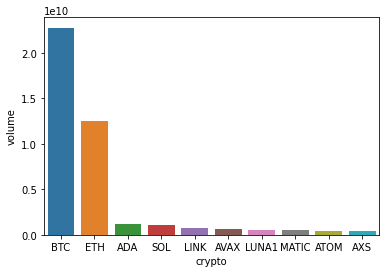

In [22]:
sns.barplot(x='crypto',y='volume',data=avg_df, order=avg_df.sort_values('volume', ascending=False).crypto)

<AxesSubplot:xlabel='crypto', ylabel='high'>

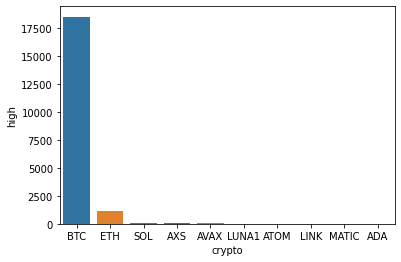

In [20]:
sns.barplot(x='crypto',y='high',data=avg_df, order=avg_df.sort_values('high', ascending=False).crypto)

In [21]:
df_btc

,crypto,high,low,close,open,volume,adj_close,year
Date,,,,,,,,
2017-04-26,BTC,1294.829956,1265.930054,1281.079956,1265.989990,3.296310e+08,1281.079956,2017
2017-04-27,BTC,1319.699951,1281.300049,1317.729980,1281.880005,4.491970e+08,1317.729980,2017
2017-04-28,BTC,1331.280029,1292.369995,1316.479980,1317.739990,5.274890e+08,1316.479980,2017
2017-04-29,BTC,1327.199951,1315.209961,1321.790039,1317.839966,4.227060e+08,1321.790039,2017
2017-04-30,BTC,1347.910034,1314.920044,1347.890015,1321.869995,4.131150e+08,1347.890015,2017
...,...,...,...,...,...,...,...,...
2022-04-21,BTC,42893.582031,40063.828125,40527.363281,41371.515625,3.537279e+10,40527.363281,2022
2022-04-22,BTC,40777.757812,39315.417969,39740.320312,40525.863281,2.801172e+10,39740.320312,2022
2022-04-23,BTC,39935.859375,39352.203125,39486.730469,39738.722656,1.613802e+10,39486.730469,2022


In [22]:
iday = df_btc.loc['2020-12-31':'2022-4-06',:]

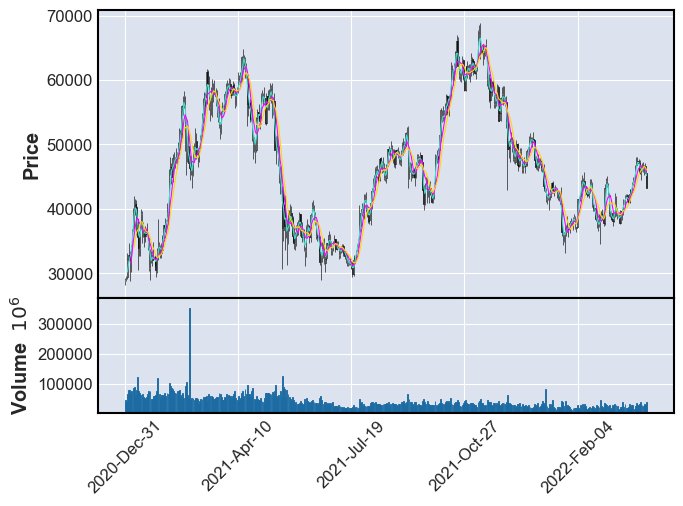

In [23]:
mpf.plot(iday,type='candle',mav=(3,6,9),volume=True)

# BTC Prediction 

#### Goal:
Predict trend bullish or bearish and calculate the possible highest value for the next 24 hours.


### preprocessing
Create df with the necessary columns. For now only use existing information. Later try to get knowledge on daily trading metrics.

In [46]:
df_test = df_btc.copy()

In [49]:
len(df_test)

1826

In [62]:
df_test["high"].iloc[1:].reset_index().high

0        1319.699951
1        1331.280029
2        1327.199951
3        1347.910034
4        1434.319946
            ...     
1820    42893.582031
1821    40777.757812
1822    39935.859375
1823    39845.925781
1824    40491.753906
Name: high, Length: 1825, dtype: float64

In [60]:
# First I wanna create our target data column.
# The target feature is the next 24 hour high


df_test["high_t+1"] = df_test["high"].iloc[1:].reset_index().high



In [63]:
# needed to reset otherwise the indexes are messing the next code up
df_test.reset_index(inplace=True)

In [65]:
# First I wanna create our target data column.
# The target feature is the next 24 hour high

df_test["high_t+1"] = df_test["high"].iloc[1:].reset_index().high

In [74]:
df_test.drop(columns=['crypto','adj_close','year'], inplace = True)



In [76]:
df_test.drop(columns=['Date'], inplace = True)


In [79]:
df_test = df_test.iloc[:-1]

,high,low,close,open,volume,high_t+1
0,1294.829956,1265.930054,1281.079956,1265.989990,3.296310e+08,1319.699951
1,1319.699951,1281.300049,1317.729980,1281.880005,4.491970e+08,1331.280029
2,1331.280029,1292.369995,1316.479980,1317.739990,5.274890e+08,1327.199951
3,1327.199951,1315.209961,1321.790039,1317.839966,4.227060e+08,1347.910034
4,1347.910034,1314.920044,1347.890015,1321.869995,4.131150e+08,1434.319946
...,...,...,...,...,...,...
1819,41672.960938,40618.632812,41502.750000,40828.175781,2.530321e+10,42126.300781
1820,42126.300781,40961.097656,41374.378906,41501.746094,2.781953e+10,42893.582031
1821,42893.582031,40063.828125,40527.363281,41371.515625,3.537279e+10,40777.757812
1822,40777.757812,39315.417969,39740.320312,40525.863281,2.801172e+10,39935.859375


## Modelling

In [86]:
len(df_test)*0.8

1459.2

In [91]:
df_copy = df_test.iloc[:1458]
test_df = df_test.iloc[1458:]

In [92]:
df_copy["high_t+1"]

0        1319.699951
1        1331.280029
2        1327.199951
3        1347.910034
4        1434.319946
            ...     
1453    57520.054688
1454    57062.148438
1455    56757.972656
1456    55410.230469
1457    52120.792969
Name: high_t+1, Length: 1458, dtype: float64

In [103]:
X,y = df_copy.drop("high_t+1", axis = 1), df_copy["high_t+1"]
X_train, X_val, y_train, y_val = train_test_split(X, y,random_state=42, test_size=0.20, shuffle=True,stratify=y)
#X_test, y_test = test_df.drop("high_t+1",axis = 1), test_df["high_t+1"]

#print(f"X_train Dim: {X_train.shape} \nX_val Dim: {X_val.shape} \nX_test Dim: {X_test.shape}")

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

### Test 1 Logistic Regression


In [ ]:
#Scaling data
X_train_scaled = functions.scaler_function(X_train)
X_val_scaled = functions.scaler_function(X_val)
X_test_scaled = functions.scaler_function(X_test)

In [ ]:
#Logistic Regression
logreg = LogisticRegression(max_iter=500).fit(X_train_scaled, y_train)
scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5)
logreg_pred = logreg.predict(X_val_scaled)

#Logistic metrics on train and val data
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Validation accuracy: {:.3f}".format(logreg.score(X_val_scaled, y_val)))
print("F1 score: {:.3f}".format(f1_score(y_val, logreg_pred)))
print(confusion_matrix(y_val, logreg_pred))
logreg_precision_score = precision_score(y_val,logreg_pred)
logreg_recall_score = recall_score(y_val, logreg_pred)
print(f"Precision Score: {round(logreg_precision_score,2)}\nRecall Score: {round(logreg_recall_score,2)}")